# Interpolation
`sbmlutils` provides functionality for creating interpolated functions in SBML models. This allows to drive the model with experimental data sets. 

## Dataset
In a first step an experimental data set is loaded as a `pandas` DataFrame.

     x    y      z
0  0.0  0.0  10.00
1  1.0  2.0   5.00
2  2.0  1.0   2.50
3  3.0  1.5   1.25
4  4.0  2.5   0.60
5  5.0  3.5   0.30


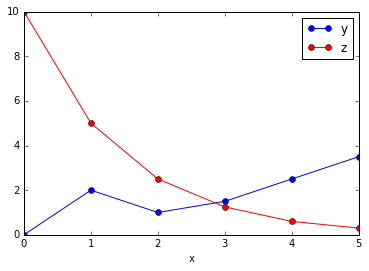

In [8]:
%matplotlib inline
from __future__ import print_function, division
import sbmlutils
# load the data
import pandas as pd
data = pd.read_csv('../../interpolation/data1.tsv', '\t')
print(data)

from matplotlib import pyplot as plt
plt.plot(data['x'], data['y'], '-o', label="y", color="blue")
plt.plot(data['x'], data['z'], '-o', label="z", color="red")
plt.xlabel('x')
plt.legend();

## Interpolate data
Now we interpolate the experimental data with different methods.

In [10]:
# import the interpolation functionality
from sbmlutils.interpolation import *

# constant interpolation
ip_constant = Interpolation(data=data, method=INTERPOLATION_CONSTANT)
ip_constant.write_sbml_to_file("data1_constant.xml")

# linear interpolation
ip_linear = Interpolation(data=data, method=INTERPOLATION_LINEAR)
ip_linear.write_sbml_to_file("data1_linear.xml")

# natural cubic spline
ip_cubic = Interpolation(data=data, method=INTERPOLATION_CUBIC_SPLINE)
ip_cubic.write_sbml_to_file("data1_cubic.xml")

 filename : /tmp/tmp4oSYNz/validated.xml
 file size (byte) : 8341
 read time (ms) : 5.518913
 c-check time (ms) : 5.074978
 validation error(s) : 0
 consistency error(s): 0
 validation warning(s) : 0
 consistency warning(s): 0 

 filename : /tmp/tmpQmE6lh/validated.xml
 file size (byte) : 11902
 read time (ms) : 7.817030
 c-check time (ms) : 6.180048
 validation error(s) : 0
 consistency error(s): 0
 validation warning(s) : 0
 consistency warning(s): 0 

 filename : /tmp/tmpmFIGi1/validated.xml
 file size (byte) : 20914
 read time (ms) : 10.993004
 c-check time (ms) : 6.604910
 validation error(s) : 0
 consistency error(s): 0
 validation warning(s) : 0
 consistency warning(s): 0 



## Simulate
In the next step we can use the interpolation SBML models for simulation.

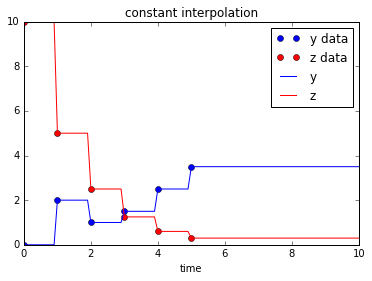

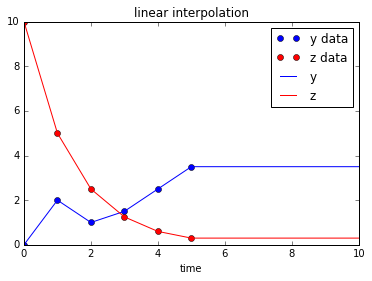

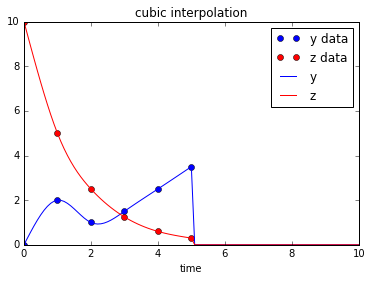

In [11]:
# simulate
def plot_data(s, name):
    """ Helper function for plotting interpolation with data. """
    from matplotlib import pyplot as plt
    plt.plot(data['x'], data['y'], 'o', label="y data", color="blue")
    plt.plot(data['x'], data['z'], 'o', label="z data", color="red")
    plt.plot(s['time'], s['y'], '-', label="y", color="blue")
    plt.plot(s['time'], s['z'], '-', label="z", color="red")
    plt.xlabel('time')
    plt.title('{} interpolation'.format(name))
    plt.legend()

import tellurium as te
for name in ['constant', 'linear', 'cubic']:
    sbml_file = 'data1_{}.xml'.format(name)
    r = te.loads(sbml_file)

    # Simulate the interpolation
    r.timeCourseSelections = ['time', 'y', 'z']
    s = r.simulate(0,10,steps=100)

    plot_data(s, name=name)
    plt.show()

## Combine models
Combination of a fitted data model with a regular model via comp.

In [12]:
from sbmlutils.interpolation import Interpolation, INTERPOLATION_CUBIC_SPLINE
ip = Interpolation(data=data, method=INTERPOLATION_CUBIC_SPLINE)
sbml_str = ip.write_sbml_to_string()
r = te.loads(sbml_str)
a_spline = r.getAntimony()
print(a_spline)

 filename : /tmp/tmpBHAuFM/validated.xml
 file size (byte) : 20914
 read time (ms) : 12.252808
 c-check time (ms) : 9.690046
 validation error(s) : 0
 consistency error(s): 0
 validation warning(s) : 0
 consistency warning(s): 0 

// Created by libAntimony v2.9.0
model *Interpolation_cubic_spline()

  // Assignment Rules:
  y := piecewise(-0.901913875598*(time - 0)^3 + 0*(time - 0)^2 + 2.9019138756*(time - 0) + 0, (time >= 0) && (time <= 1), 1.50956937799*(time - 1)^3 + -2.70574162679*(time - 1)^2 + 0.196172248804*(time - 1) + 2, (time >= 1) && (time <= 2), -0.636363636364*(time - 2)^3 + 1.82296650718*(time - 2)^2 + -0.686602870813*(time - 2) + 1, (time >= 2) && (time <= 3), 0.0358851674641*(time - 3)^3 + -0.0861244019139*(time - 3)^2 + 1.05023923445*(time - 3) + 1.5, (time >= 3) && (time <= 4), -0.00717703349282*(time - 4)^3 + 0.0215311004785*(time - 4)^2 + 0.985645933014*(time - 4) + 2.5, (time >= 4) && (time <= 5), 0);
  z := piecewise(0.58995215311*(time - 0)^3 + 0*(time - 0)^2 + -

// Created by libAntimony v2.9.0
model *test()

  // Compartments and Species:
  species S1, S2, $S3, $S4;

  // Assignment Rules:
  S3 := y;
  y := piecewise(-0.901913875598*(time - 0)^3 + 0*(time - 0)^2 + 2.9019138756*(time - 0) + 0, (time >= 0) && (time <= 1), 1.50956937799*(time - 1)^3 + -2.70574162679*(time - 1)^2 + 0.196172248804*(time - 1) + 2, (time >= 1) && (time <= 2), -0.636363636364*(time - 2)^3 + 1.82296650718*(time - 2)^2 + -0.686602870813*(time - 2) + 1, (time >= 2) && (time <= 3), 0.0358851674641*(time - 3)^3 + -0.0861244019139*(time - 3)^2 + 1.05023923445*(time - 3) + 1.5, (time >= 3) && (time <= 4), -0.00717703349282*(time - 4)^3 + 0.0215311004785*(time - 4)^2 + 0.985645933014*(time - 4) + 2.5, (time >= 4) && (time <= 5), 0);
  S4 := z;
  z := piecewise(0.58995215311*(time - 0)^3 + 0*(time - 0)^2 + -5.58995215311*(time - 0) + 10, (time >= 0) && (time <= 1), -0.44976076555*(time - 1)^3 + 1.76985645933*(time - 1)^2 + -3.82009569378*(time - 1) + 5, (time >= 1) && (time <

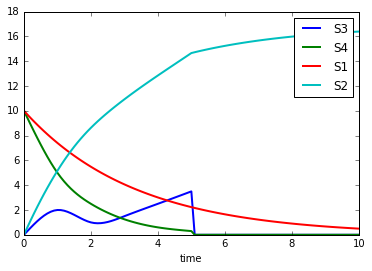

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [13]:
# combine the models with antimony
a_test = a_spline + """
model *test()
    // add spline submodel to the model
    A: Interpolation_cubic_spline();
    
    J0: S1 -> S2; k1*S1;
    J1: $S3 -> S2; k1*S3;
    J2: $S4 -> S2; k1*S4;
    S1 = 10.0; S2=0.0; S3=0.0; S4=0.0
    k1 = 0.3;
    
    // use the submodel info in model not working
    A.y is y;
    A.z is z;
    
    S3 := y
    S4 := z
end
"""

r2 = te.loada(a_test)
print(r2.getAntimony())
r2.timeCourseSelections = ['time'] + r2.getBoundarySpeciesIds() + r2.getFloatingSpeciesIds()
print(r2.timeCourseSelections)

s = r2.simulate(0, 10, 101)
r2.plot(s)